https://mlcourse.ai/book/topic02/assignment02_analyzing_cardiovascular_desease_data.html

Problem
Predict the presence or absence of cardiovascular disease (CVD) using the patient examination results.

Part 1. Preliminary data analysis
First, we will initialize the environment:

In [12]:
# Import all required modules
# Disable warnings
import warnings

import numpy as np
import pandas as pd

warnings.filterwarnings("ignore")

# Import plotting modules and set up
import seaborn as sns

sns.set()
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.ticker

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [13]:
# Tune the visual settings for figures in `seaborn`
sns.set_context(
    "notebook", font_scale=1.5, rc={"figure.figsize": (11, 8), "axes.titlesize": 18}
)

from matplotlib import rcParams

rcParams["figure.figsize"] = 11, 8

In [14]:
# for Jupyter-book, we copy data from GitHub, locally, to save Internet traffic,
# you can specify the data/ folder from the root of your cloned
# https://github.com/Yorko/mlcourse.ai repo, to save Internet traffic
DATA_PATH = "https://raw.githubusercontent.com/Yorko/mlcourse.ai/main/data/"
df = pd.read_csv(DATA_PATH + "mlbootcamp5_train.csv", sep=";")
print("Dataset size: ", df.shape)
df.head()

Dataset size:  (70000, 13)


,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


It would be instructive to peek into the values of our variables.

Let’s convert the data into long format and depict the value counts of the categorical features using catplot().

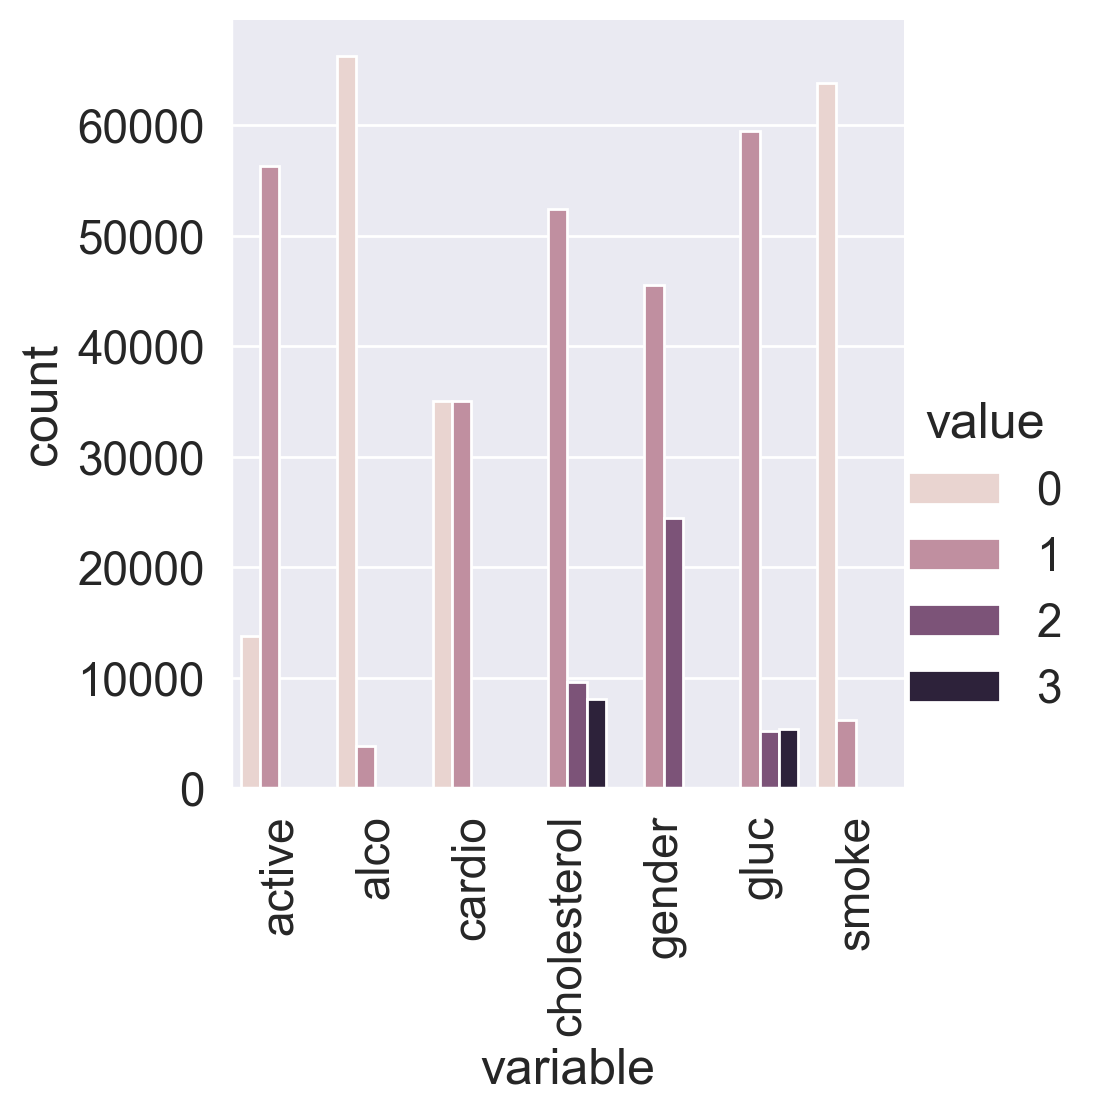

In [15]:
df_uniques = pd.melt(
    frame=df,
    value_vars=["gender", "cholesterol", "gluc", "smoke", "alco", "active", "cardio"],
)
df_uniques = (
    pd.DataFrame(df_uniques.groupby(["variable", "value"])["value"].count())
    .sort_index(level=[0, 1])
    .rename(columns={"value": "count"})
    .reset_index()
)

sns.catplot(
    x="variable", y="count", hue="value", data=df_uniques, kind="bar"
)
plt.xticks(rotation='vertical');

We can see that the target classes are balanced. That’s great!

Let’s split the dataset by target values. Can you already spot the most significant feature by just looking at the plot?

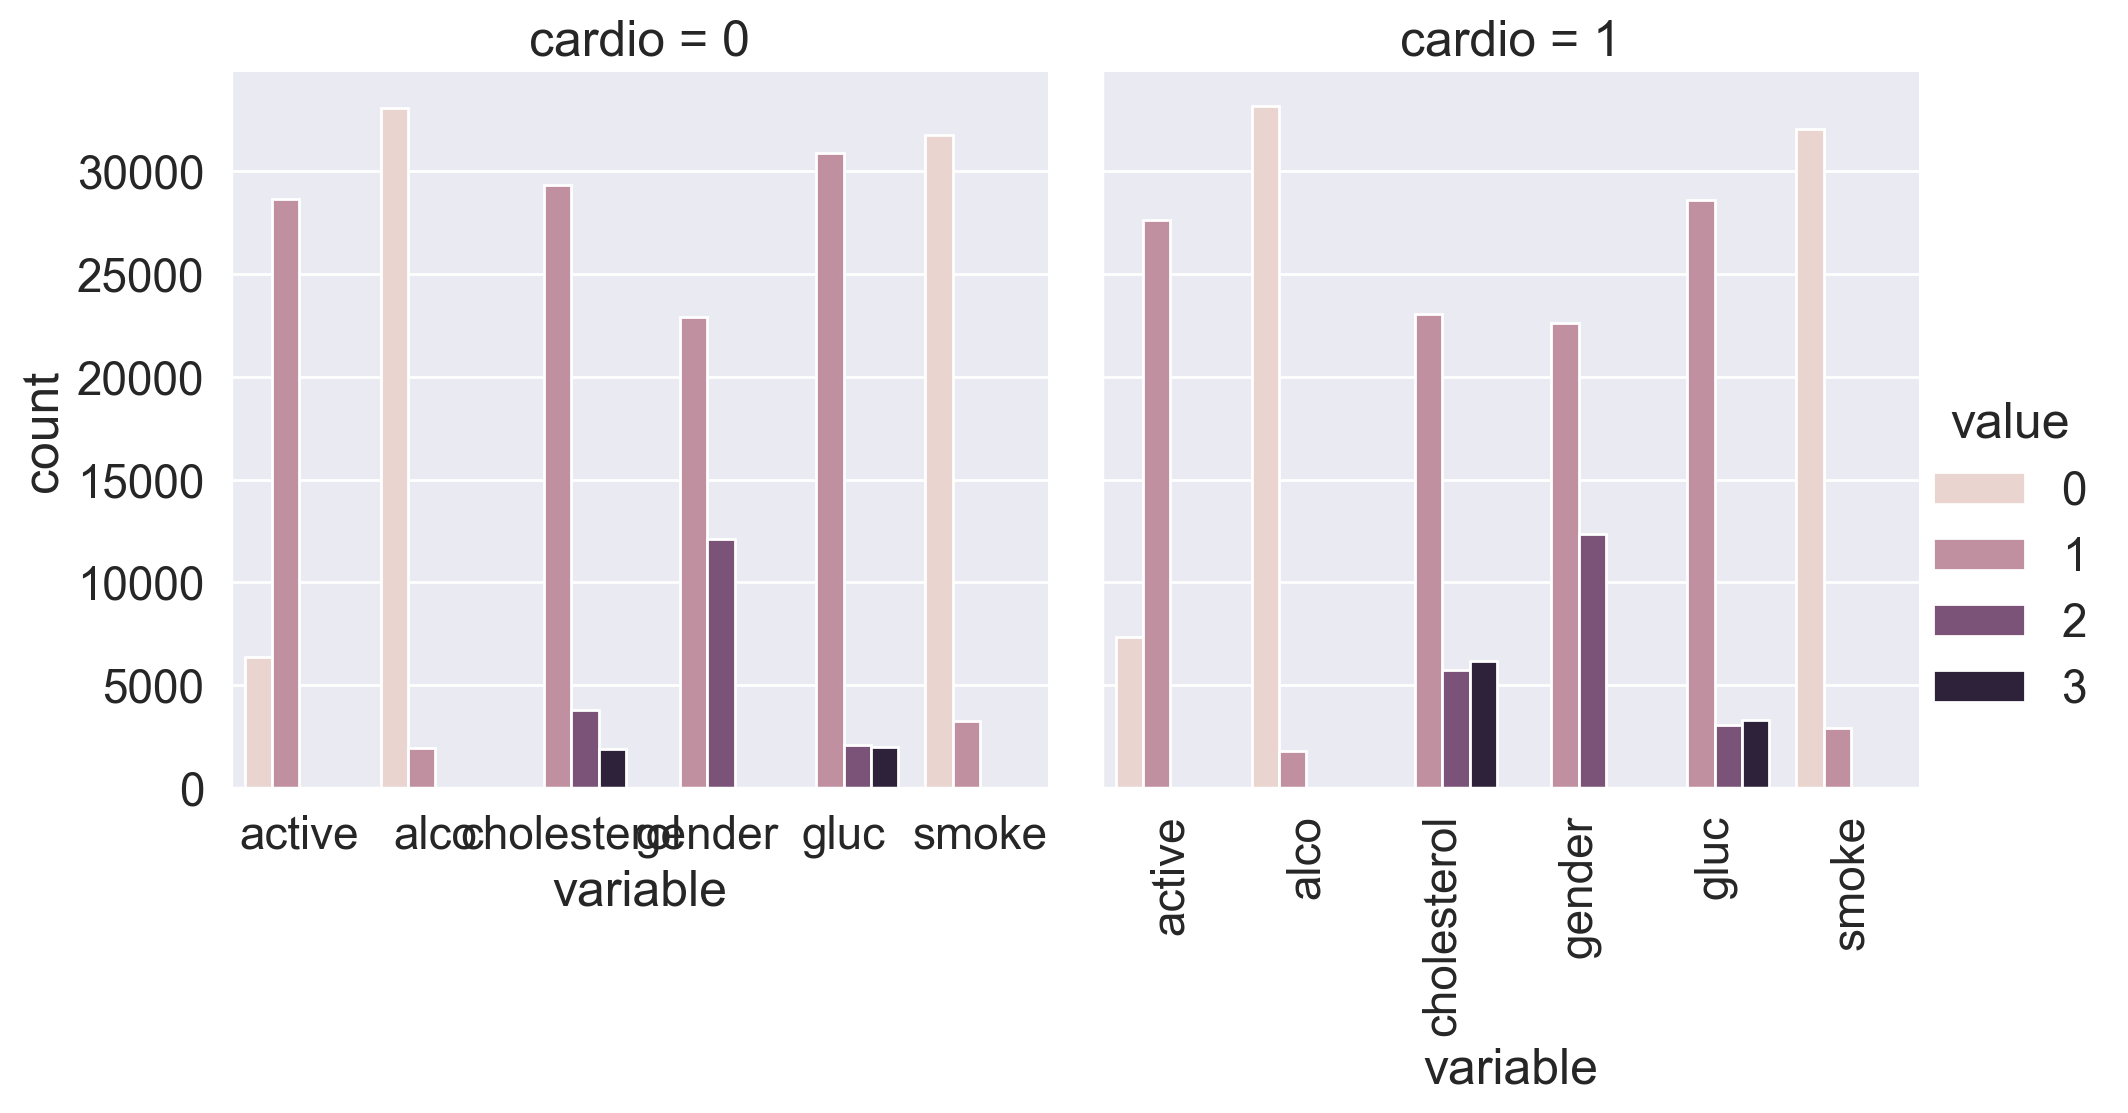

In [16]:
df_uniques = pd.melt(
    frame=df,
    value_vars=["gender", "cholesterol", "gluc", "smoke", "alco", "active"],
    id_vars=["cardio"],
)
df_uniques = (
    pd.DataFrame(df_uniques.groupby(["variable", "value", "cardio"])["value"].count())
    .sort_index(level=[0, 1])
    .rename(columns={"value": "count"})
    .reset_index()
)

sns.catplot(
    x="variable",
    y="count",
    hue="value",
    col="cardio",
    data=df_uniques,
    kind="bar",
)
plt.xticks(rotation='vertical');

You can see that the distribution of cholesterol and glucose levels great differs by the value of the target variable. Is this a coincidence?

Now, let’s calculate some statistics for the feature unique values:

In [17]:
for c in df.columns:
    n = df[c].nunique()
    print(c)
    if n <= 3:
        print(n, sorted(df[c].value_counts().to_dict().items()))
    else:
        print(n)
    print(10 * "-")

id
70000
----------
age
8076
----------
gender
2 [(1, 45530), (2, 24470)]
----------
height
109
----------
weight
287
----------
ap_hi
153
----------
ap_lo
157
----------
cholesterol
3 [(1, 52385), (2, 9549), (3, 8066)]
----------
gluc
3 [(1, 59479), (2, 5190), (3, 5331)]
----------
smoke
2 [(0, 63831), (1, 6169)]
----------
alco
2 [(0, 66236), (1, 3764)]
----------
active
2 [(0, 13739), (1, 56261)]
----------
cardio
2 [(0, 35021), (1, 34979)]
----------


In the end, we have:

5 numerical features (excluding id);

7 categorical features;

70000 records in total.

1.1. Basic observations
Question 1.1. (1 point). How many men and women are present in this dataset? Values of the gender feature were not given (whether “1” stands for women or for men) – figure this out by looking analyzing height, making the assumption that men are taller on average.
45530 women and 24470 men

45530 men and 24470 women

45470 women and 24530 men

45470 men and 24530 women

In [18]:
df.groupby("gender")["height"].mean()

gender
1    161.355612
2    169.947895
Name: height, dtype: float64

In [19]:
df["gender"].value_counts()

gender
1    45530
2    24470
Name: count, dtype: int64

45530 women and 24470 men

Question 1.2. (1 point). Who more often report consuming alcohol – men or women?

In [20]:
df.groupby("gender")["alco"].value_counts()

gender  alco
1       0       44369
        1        1161
2       0       21867
        1        2603
Name: count, dtype: int64

In [21]:
df.groupby("gender")["alco"].mean()

gender
1    0.025500
2    0.106375
Name: alco, dtype: float64

Question 1.3. (1 point). What’s the rounded difference between the percentages of smokers among men and women?

4 16 20 24

In [22]:
df.groupby("gender")["smoke"].mean()

gender
1    0.017856
2    0.218880
Name: smoke, dtype: float64

Question 1.4. (1 point). What’s the rounded difference between median values of age (in months) for non-smokers and smokers? You’ll need to figure out the units of feature age in this dataset.

In [24]:
dfm = df
dfm['months']=dfm['age']/365.25*12
dfm.groupby('smoke')['months'].median()

smoke
0    647.950719
1    628.336756
Name: months, dtype: float64

Clarifications:

Calculate age_years feature – rounded age in years. For this task, select people aged from 60 to 64 inclusive.

Cholesterol level categories in the figure and in our data are different. In the figure, the values of cholesterol feature are as follows: 4 mmol/l 
 1, 5-7 mmol/l 
 2, 8 mmol/l 
 3.

Question 1.5. (2 points). Calculate fractions of ill people (with CVD) in the two groups of people described in the task. What’s the ratio of these two fractions?

In [26]:
df["age_years"] = (df["age"] / 365.25).round().astype("int")
df["age_years"].max()

65

The oldest people in the sample are aged 65. Coincidence? Don’t think so! Let’s select smoking men of age [60,64].

In [27]:
smoking_old_men = df[
    (df["gender"] == 2)
    & (df["age_years"] >= 60)
    & (df["age_years"] < 65)
    & (df["smoke"] == 1)
]

If cholesterol level in this age group is 1, and systolic pressure is below 120, then the proportion of people with CVD is 26%.

In [28]:
smoking_old_men[
    (smoking_old_men["cholesterol"] == 1) & (smoking_old_men["ap_hi"] < 120)
]["cardio"].mean()

0.2631578947368421

If, however, cholesterol level in this age group is 3, and systolic pressure is from 160 to 180, then the proportion of people with a CVD is 86%.

In [29]:
smoking_old_men[
    (smoking_old_men["cholesterol"] == 3)
    & (smoking_old_men["ap_hi"] >= 160)
    & (smoking_old_men["ap_hi"] < 180)
]["cardio"].mean()

0.8636363636363636

1.3. Analyzing BMI
Task:
Create a new feature – BMI (Body Mass Index). To do this, divide weight in kilograms by the square of height in meters. Normal BMI values are said to be from 18.5 to 25.

Question 1.6. (2 points). Choose the correct statements:.

FALSE: Median BMI in the sample is within boundaries of normal values.

TRUE: Women’s BMI is on average higher then men’s.

Healthy people have higher median BMI than ill people.

In the segment of healthy and non-drinking men BMI is closer to the norm than in the segment of healthy and non-drinking women

In [31]:
df["BMI"] = df["weight"] / (df["height"] / 100) ** 2
df["BMI"].median()

26.374068120774975

In [32]:
df.groupby("gender")["BMI"].median()

gender
1    26.709402
2    25.910684
Name: BMI, dtype: float64

In [33]:
df.groupby(["gender", "alco", "cardio"])["BMI"].median().to_frame()

BMI
gender alco cardio           
1      0    0       25.654372
            1       27.885187
       1    0       27.885187
            1       30.110991
2      0    0       25.102391
            1       26.674874
       1    0       25.351541
            1       27.530797

1.4. Cleaning data
Task:
We can notice, that the data is not perfect. It contains much of “dirt” and inaccuracies. We’ll see it better when we do data visualization.

Filter out the following patient segments (that we consider to have erroneous data)

diastolic pressure is higher then systolic.

height is strictly less than 2.5%-percentile (use pd.Series.quantile. If not familiar with it – please read the docs)

height is strictly more than 97.5%-percentile

weight is strictly less then 2.5%-percentile

weight is strictly more than 97.5%-percentile

This is not all we can do to clean the data, but let’s stop here by now.

In [38]:
df_to_remove = df[
    (df["ap_lo"] > df["ap_hi"])
    | (df["height"] < df["height"].quantile(0.025))
    | (df["height"] > df["height"].quantile(0.975))
    | (df["weight"] < df["weight"].quantile(0.025))
    | (df["weight"] > df["weight"].quantile(0.975))
]
df_to_remove.shape[0] / df.shape[0]


0.0963

In [39]:
filtered_df = df[~df.index.isin(df_to_remove)]